In [3]:
import numpy as np
import matplotlib.pyplot as plt
import dataset_utils
import os
import random
import torch
import matplotlib.pyplot as plt
import numpy as np
from config import cfg
from datasets import LandCoverDataset
from models.deeplab import get_model as get_deeplab_model
from PIL import Image
from torch.utils.data import DataLoader, Subset
from utils import get_validation_augmentation, get_training_augmentation, get_preprocessing, save_history, save_model, reverse_one_hot, colour_code_segmentation, visualize

In [5]:
LANDCOVER_ROOT = '/root/deepglobe'

In [6]:
train_df, val_df = dataset_utils.get_landcover_train_val_df(LANDCOVER_ROOT, random_state=cfg.SEED)
dataset_info = dataset_utils.get_landcover_info(LANDCOVER_ROOT, include_unknow=True)
class_names = dataset_info['class_names']
class_rgb_values = dataset_info['class_rgb_values']
select_class_rgb_values = dataset_info['select_class_rgb_values']

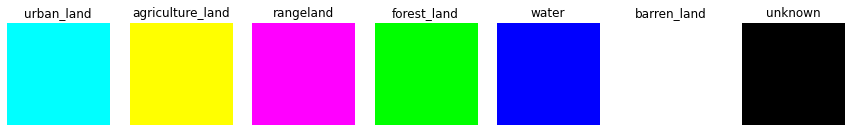

In [45]:
fig, ax = plt.subplots(1, len(class_names), figsize=(15, 7))

for idx, (class_name, rgb_value) in enumerate(zip(class_names, class_rgb_values)):
    color_img = np.zeros([100, 100, 3],dtype=np.uint8)
    color_img[:, :] = rgb_value
    ax[idx].imshow(color_img)
    ax[idx].axis('off')
    ax[idx].set_title(class_name)

plt.savefig('class_colors.jpeg')

In [16]:
class_rgb_values[1]

[255, 255, 0]